In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import norm

In [2]:
data = pd.read_csv('train.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
data.shape

(550068, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
missing_Values = data.isnull().sum()/data.shape[0]*100
missing_Values

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [6]:
mask = missing_Values > 0
missing1 = missing_Values[mask]
missing = pd.DataFrame(missing1).reset_index()
missing = missing.rename(columns = {'index':'Feature_Name',0:'Missing_Values_Percentage'})
missing.sort_values(by = 'Missing_Values_Percentage',ascending = True,inplace = True)
missing

,Feature_Name,Missing_Values_Percentage
0,Product_Category_2,31.566643
1,Product_Category_3,69.672659


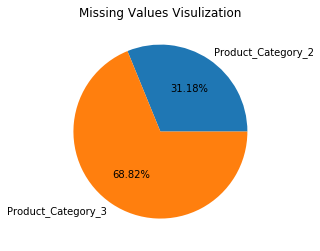

In [7]:
# lets visulize the missing values
plt.pie(missing['Missing_Values_Percentage'],labels = missing['Feature_Name'],autopct = '%.2f%%')
plt.title('Missing Values Visulization')
plt.show()

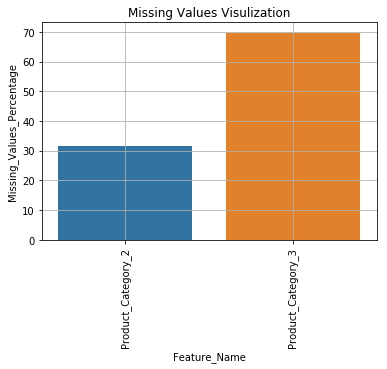

In [8]:
# lets visulize the missing values
sns.barplot(missing['Feature_Name'],missing['Missing_Values_Percentage'])
plt.grid(True)
plt.xticks(rotation = 90)
plt.title('Missing Values Visulization')
plt.show()

# Checking the Distribution of Target Variable (Purchase)

In [9]:
import warnings
warnings.filterwarnings('ignore')

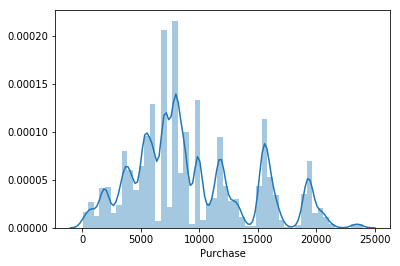

In [10]:
sns.distplot(data['Purchase'])

- We see that the target variable SalePrice has a right-skewed distribution. We'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. In addition, linear algorithms assume constant variance in the error term. Alternatively, we can also confirm this skewed behavior using the skewness metric.

In [11]:
print('The Skewness of the Target Variable Purchase is {}'.format(data['Purchase'].skew()))

The Skewness of the Target Variable Purchase is 0.6001400037087128


In [12]:
target1 = np.power(data['Purchase'],10)

print(target1.skew())

-0.00035384411954706384


(array([53948., 53413., 52912., 58846., 51268., 62200., 54318., 52875.,
        56629., 53659.]),
 array([-9.22320151e+18, -7.37886689e+18, -5.53453227e+18, -3.69019766e+18,
        -1.84586304e+18, -1.52841976e+15,  1.84280620e+18,  3.68714082e+18,
         5.53147543e+18,  7.37581005e+18,  9.22014467e+18]),
 <a list of 10 Patch objects>)

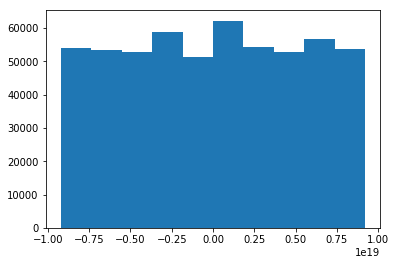

In [13]:
plt.hist(target1)

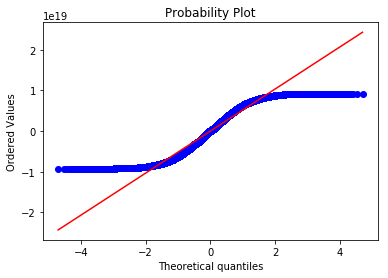

In [14]:
import pylab
stats.probplot(target1, dist="norm", plot=pylab)
pylab.show()

# Product_Id wise Purchases

In [15]:
product_id_vs_purchases = data[['Product_ID','Purchase']]
product_id_vs_purchases = product_id_vs_purchases.groupby(['Product_ID'])['Purchase'].sum().reset_index()
product_id_vs_purchases = product_id_vs_purchases.sort_values(by = 'Purchase',ascending = False)
product_id_vs_purchases.head()

,Product_ID,Purchase
249,P00025442,27995166
1016,P00110742,26722309
2443,P00255842,25168963
582,P00059442,24338343
1745,P00184942,24334887


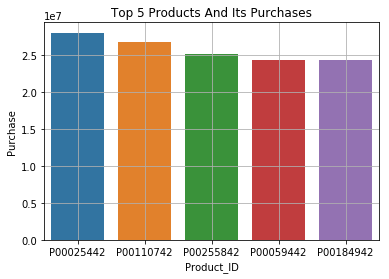

In [16]:
sns.barplot(product_id_vs_purchases['Product_ID'].head(5),product_id_vs_purchases['Purchase'].head(5))
plt.grid(True)
plt.title('Top 5 Products And Its Purchases')
plt.show()

# Gender Vs Purchases

In [17]:
gender_vs_purchase = data[['Gender','Purchase']]
gender_vs_purchase = gender_vs_purchase.groupby(['Gender'])['Purchase'].sum().reset_index()
gender_vs_purchase

,Gender,Purchase
0,F,1186232642
1,M,3909580100


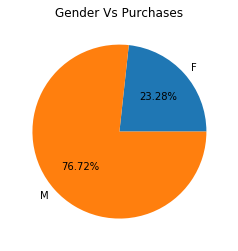

In [18]:
plt.pie(gender_vs_purchase['Purchase'],labels = gender_vs_purchase['Gender'],autopct = '%.2f%%')
plt.title('Gender Vs Purchases')
plt.show()

# Age wise Purchases

In [19]:
age_vs_purchase = data[['Age','Purchase']]
age_vs_purchase = age_vs_purchase.groupby(['Age'])['Purchase'].sum().reset_index()
age_vs_purchase

,Age,Purchase
0,0-17,134913183
1,18-25,913848675
2,26-35,2031770578
3,36-45,1026569884
4,46-50,420843403
5,51-55,367099644
6,55+,200767375


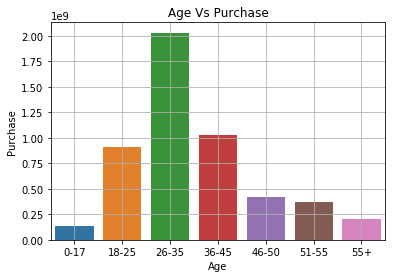

In [20]:
sns.barplot(age_vs_purchase['Age'],age_vs_purchase['Purchase'])
plt.grid(True)
plt.title('Age Vs Purchase')
plt.show()

# Occupation Vs Purchase

In [21]:
occupation_vs_purchase = data[['Occupation','Purchase']]
occupation_vs_purchase = occupation_vs_purchase.groupby(['Occupation'])['Purchase'].sum().reset_index()
occupation_vs_purchase = occupation_vs_purchase.sort_values(by = 'Purchase',ascending = False)
occupation_vs_purchase

,Occupation,Purchase
4,4,666244484
0,0,635406958
7,7,557371587
1,1,424614144
17,17,393281453
12,12,305449446
20,20,296570442
14,14,259454692
16,16,238346955
2,2,238028583


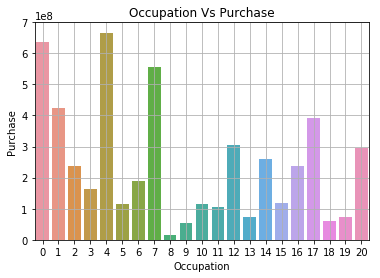

In [22]:
sns.barplot(occupation_vs_purchase['Occupation'],occupation_vs_purchase['Purchase'])
plt.grid(True)
plt.title('Occupation Vs Purchase')
plt.show()

# city category vs purchase

In [23]:
city_category_vs_purchase = data[['City_Category','Purchase']]
city_category_vs_purchase = city_category_vs_purchase.groupby(['City_Category'])['Purchase'].sum().reset_index()
city_category_vs_purchase

,City_Category,Purchase
0,A,1316471661
1,B,2115533605
2,C,1663807476


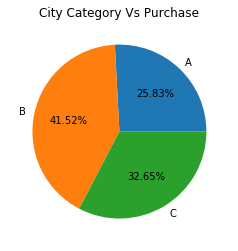

In [24]:
plt.pie(city_category_vs_purchase['Purchase'],labels = city_category_vs_purchase['City_Category'],
        autopct = '%.2f%%')
plt.title('City Category Vs Purchase')
plt.show()

# Stay_In_Current_City_Years Vs Purchase

In [25]:
Stay_In_Current_City_Years_Vs_Purchase = data[['Stay_In_Current_City_Years','Purchase']]
Stay_In_Current_City_Years_Vs_Purchase = Stay_In_Current_City_Years_Vs_Purchase.groupby(['Stay_In_Current_City_Years'])['Purchase'].sum().reset_index()
Stay_In_Current_City_Years_Vs_Purchase.sort_values(by = 'Purchase',ascending = False,inplace = True)
Stay_In_Current_City_Years_Vs_Purchase

,Stay_In_Current_City_Years,Purchase
1,1,1792872533
2,2,949173931
3,3,884902659
4,4+,785884390
0,0,682979229


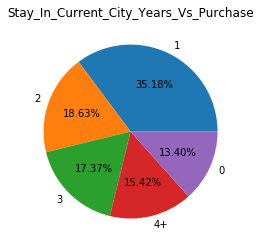

In [26]:
plt.pie(Stay_In_Current_City_Years_Vs_Purchase['Purchase'],
                    labels = Stay_In_Current_City_Years_Vs_Purchase['Stay_In_Current_City_Years'],
                    autopct = '%.2f%%')
plt.title('Stay_In_Current_City_Years_Vs_Purchase')
plt.show()

# Martial Status Vs Purchase

In [27]:
martial_status_vs_purchase = data[['Marital_Status','Purchase']]
martial_status_vs_purchase = martial_status_vs_purchase.groupby(['Marital_Status'])['Purchase'].sum().reset_index()
martial_status_vs_purchase

,Marital_Status,Purchase
0,0,3008927447
1,1,2086885295


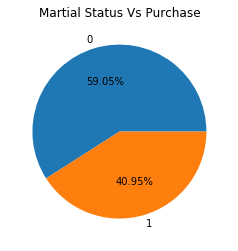

In [28]:
plt.pie(martial_status_vs_purchase['Purchase'],labels = martial_status_vs_purchase['Marital_Status'],
                                                        autopct = '%.2f%%')
plt.title('Martial Status Vs Purchase')
plt.show()

# Product_Category_1 vs purchase

In [29]:
Product_Category_1_vs_purchase = data[['Product_Category_1','Purchase']]
Product_Category_1_vs_purchase = Product_Category_1_vs_purchase.groupby(['Product_Category_1'])['Purchase'].sum().reset_index()
Product_Category_1_vs_purchase.sort_values(by = 'Purchase',ascending = False,inplace = True)
Product_Category_1_vs_purchase

,Product_Category_1,Purchase
0,1,1910013754
4,5,941835229
7,8,854318799
5,6,324150302
1,2,268516186
2,3,204084713
15,16,145120612
10,11,113791115
9,10,100837301
14,15,92969042


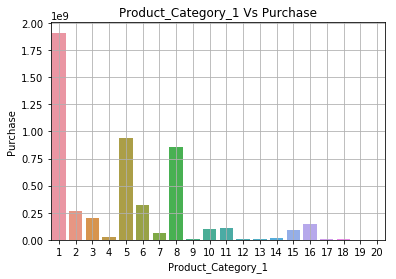

In [30]:
sns.barplot(Product_Category_1_vs_purchase['Product_Category_1'],
            Product_Category_1_vs_purchase['Purchase'])
plt.grid(True)
plt.title('Product_Category_1 Vs Purchase')
plt.show()

# Product_Category_2_vs_purchase

In [31]:
Product_Category_2_vs_purchase = data[['Product_Category_2','Purchase']]
Product_Category_2_vs_purchase = Product_Category_2_vs_purchase.groupby(['Product_Category_2'])['Purchase'].sum().reset_index()
Product_Category_2_vs_purchase.sort_values(by = 'Purchase',ascending = False,inplace = True)
Product_Category_2_vs_purchase

,Product_Category_2,Purchase
0,2.0,670303864
6,8.0,658392656
14,16.0,445339722
13,15.0,392067176
12,14.0,391556939
2,4.0,262295485
3,5.0,236844899
4,6.0,189417477
9,11.0,126366165
15,17.0,125495400


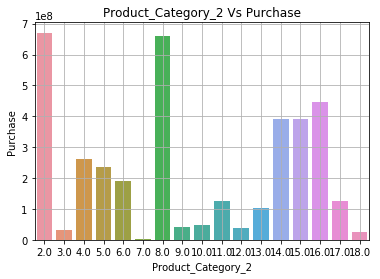

In [32]:
sns.barplot(Product_Category_2_vs_purchase['Product_Category_2'],
            Product_Category_2_vs_purchase['Purchase'])
plt.grid(True)
plt.title('Product_Category_2 Vs Purchase')
plt.show()

# Product_Category_3_vs_purchase

In [33]:
Product_Category_3_vs_purchase = data[['Product_Category_3','Purchase']]
Product_Category_3_vs_purchase = Product_Category_3_vs_purchase.groupby(['Product_Category_3'])['Purchase'].sum().reset_index()
Product_Category_3_vs_purchase.sort_values(by = 'Purchase',ascending = False,inplace = True)
Product_Category_3_vs_purchase

,Product_Category_3,Purchase
12,16.0,391040983
11,15.0,345662769
2,5.0,201858094
13,17.0,196581588
10,14.0,185249212
4,8.0,163619031
5,9.0,120788622
8,12.0,80583631
9,13.0,71977563
3,6.0,64520181


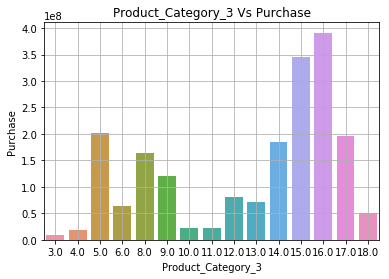

In [34]:
sns.barplot(Product_Category_3_vs_purchase['Product_Category_3'],
            Product_Category_3_vs_purchase['Purchase'])
plt.grid(True)
plt.title('Product_Category_3 Vs Purchase')
plt.show()

# Data Preprocessing

In [35]:
data['New_Product_ID'] = data['Product_ID'].str.replace('P','').astype('int')

In [36]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for column in data.columns:
    if column == 'Gender' or column == 'City_Category':
        data['New_'+ column] = le.fit_transform(data[column])
    else :
        pass

In [37]:
data['New_Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].str.replace('+','').astype('int')

In [38]:
data['New_Age'] = data['Age'].str.split('-').str.get(1)
data['New_Age'].fillna(55,inplace = True)

In [39]:
data['New_Age'] = data['New_Age'].astype(int)

In [40]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,New_Product_ID,New_Gender,New_City_Category,New_Stay_In_Current_City_Years,New_Age
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,69042,0,0,2,17
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,248942,0,0,2,17
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,87842,0,0,2,17
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,85442,0,0,2,17
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,285442,1,2,4,55


# Model Building

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

In [42]:
X = data[['New_Product_ID','New_Gender','New_Age','Occupation','New_City_Category',
          'New_Stay_In_Current_City_Years','Marital_Status','Product_Category_1',
         'Product_Category_2','Product_Category_3']]
Y = data[['Purchase']]

In [43]:
data.isnull().sum()/data.shape[1]*100

User_ID                           0.000000e+00
Product_ID                        0.000000e+00
Gender                            0.000000e+00
Age                               0.000000e+00
Occupation                        0.000000e+00
City_Category                     0.000000e+00
Stay_In_Current_City_Years        0.000000e+00
Marital_Status                    0.000000e+00
Product_Category_1                0.000000e+00
Product_Category_2                1.021400e+06
Product_Category_3                2.254394e+06
Purchase                          0.000000e+00
New_Product_ID                    0.000000e+00
New_Gender                        0.000000e+00
New_City_Category                 0.000000e+00
New_Stay_In_Current_City_Years    0.000000e+00
New_Age                           0.000000e+00
dtype: float64

In [44]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [45]:
#Import libraries:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [46]:
model = xgb.XGBRegressor(max_depth=5,min_child_weight=6,learning_rate=0.1,n_estimators=2500)
model.fit(x_train,y_train)
pred = model.predict(x_test)
print (model)

[09:25:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=6, missing=None, n_estimators=2500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)


In [47]:
rmse_2500 = np.sqrt(mean_squared_error(y_test,pred))
r2_2500 = r2_score(y_test,pred)

print('RMSE:',rmse_2500)
print('R2:', r2_2500)

RMSE: 2594.656359482938
R2: 0.7333982440914155


In [48]:
test_data = pd.read_csv('test.csv')
test_data.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN


In [49]:
test_data['New_Product_ID'] = test_data['Product_ID'].str.replace('P','').astype('int')

In [50]:
from sklearn import preprocessing

le1 = preprocessing.LabelEncoder()
for test_column in test_data.columns:
    if test_column == 'Gender' or test_column == 'City_Category':
        test_data['New_'+ test_column] = le1.fit_transform(test_data[test_column])
    else :
        pass

In [51]:
test_data['New_Stay_In_Current_City_Years'] = test_data['Stay_In_Current_City_Years'].str.replace('+','').astype('int')

In [52]:
test_data['New_Age'] = test_data['Age'].str.split('-').str.get(1)
test_data['New_Age'].fillna(55,inplace = True)

In [53]:
test_data['New_Age'] = test_data['New_Age'].astype(int)

In [54]:
test_data.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,New_Product_ID,New_Gender,New_City_Category,New_Stay_In_Current_City_Years,New_Age
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,128942,1,1,2,50
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,113442,1,2,0,35
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,288442,0,1,4,45


In [55]:
X_test_data = test_data[['New_Product_ID','New_Gender','New_Age','Occupation','New_City_Category',
          'New_Stay_In_Current_City_Years','Marital_Status','Product_Category_1',
         'Product_Category_2','Product_Category_3']]

In [56]:
test_pred = model.predict(X_test_data)
test_pred

array([16455.125 , 11993.593 ,  5976.1396, ..., 10024.828 , 18483.004 ,
        2450.9338], dtype=float32)

In [60]:
predictions = pd.DataFrame(test_pred)
predictions = predictions.rename(columns = {0:'Purchase'})
predictions.head()

,Purchase
0,16455.125000
1,11993.592773
2,5976.139648
3,2617.897705
4,2446.418213


In [61]:
test_data['Purchase'] = predictions['Purchase']
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,New_Product_ID,New_Gender,New_City_Category,New_Stay_In_Current_City_Years,New_Age,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,128942,1,1,2,50,16455.125000
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,113442,1,2,0,35,11993.592773
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,288442,0,1,4,45,5976.139648
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,145342,0,1,4,45,2617.897705
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,53842,0,2,1,35,2446.418213


In [73]:
test_data['New_user_id'] = test_data['User_ID'].astype('str')

In [84]:
test_data['User_ID_Product_ID'] = test_data.apply(lambda row: str(row["User_ID"]) + str(row["Product_ID"]), axis = 1)

In [85]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,New_Product_ID,New_Gender,New_City_Category,New_Stay_In_Current_City_Years,New_Age,Purchase,User_ID_Product_ID
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,128942,1,1,2,50,16455.125000,1000004P00128942
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,113442,1,2,0,35,11993.592773,1000009P00113442
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,288442,0,1,4,45,5976.139648,1000010P00288442
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,145342,0,1,4,45,2617.897705,1000010P00145342
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,53842,0,2,1,35,2446.418213,1000011P00053842


In [88]:
predictions = test_data[['User_ID','Product_ID','Purchase']]
predictions.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,16455.125000
1,1000009,P00113442,11993.592773
2,1000010,P00288442,5976.139648
3,1000010,P00145342,2617.897705
4,1000011,P00053842,2446.418213


In [89]:
predictions.to_csv('Predictions.csv',index = False)